In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Including Dataset

In [ ]:
data = pd.read_csv('data/maleFemale.csv')

## Data Preprocessing

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [ ]:
data.loc[ data['Sex']=='Male', 'Sex'] = 1
data.loc[ data['Sex']=='Female', 'Sex'] = 0

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [ ]:
x = data.drop( ['Sex'], axis=1 )
y = data['Sex']

In [ ]:
x.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [ ]:
# If we can nomalize the data set (features), then accuracy of predictions will be high.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
x.head()  #normalized

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [ ]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object

In [ ]:
# y's datatype is 'object'. It is not suitable for processing. Then we can change type to int.
y = y.astype('int')

##### Plot the dataset

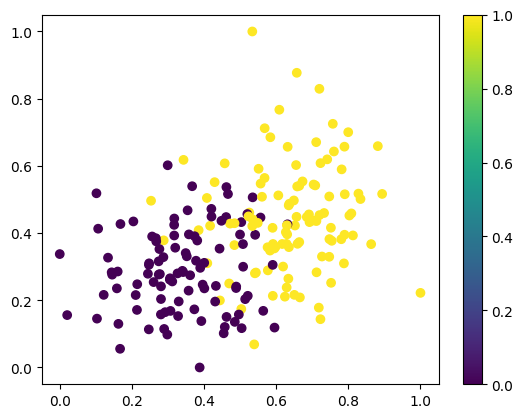

In [ ]:
plt.scatter(x['Height'], x['Weight'], c=y )   # Colour change acording to y value.
plt.colorbar()
plt.show()

In [ ]:
# Split dataset to test and train.

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
xTrain.shape, xTest.shape

((164, 2), (41, 2))

## Model Building

#### Option 1

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)

# Train the model
epoch_number = 10
model_history = model.fit(xTrain, yTrain, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 2ms/step - loss: 0.6794 - accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5244
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5244
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.5244
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.5305
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.5488
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.5976
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6524
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7317
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7683


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 16)                1040      
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9697 (37.88 KB)
Trainable params: 9697 (37.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
yPred = model.predict(xTest)
yPred[:5]

2/2 [==============================] - 0s 4ms/step


array([[0.46776786],
       [0.75417286],
       [0.7547799 ],
       [0.6073803 ],
       [0.6354849 ]], dtype=float32)

In [ ]:
yTest[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

#### **Option** 2

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)

# Train the model
epoch_number = 20
model_history = model.fit(xTrain, yTrain, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.5305
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.5305
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.5549
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.6037
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6220
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.6951
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7378
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7744
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8171
Epoch 11/20
6/6 [======================

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               384       
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 16)                1040      
                                                                 
 dense_59 (Dense)            (None, 2)                 34        
                                                                 
Total params: 9714 (37.95 KB)
Trainable params: 9714 (37.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
yPred = model.predict(xTest)
yPred[:5]

2/2 [==============================] - 0s 3ms/step


array([[0.7227813 , 0.2772187 ],
       [0.04866673, 0.9513332 ],
       [0.03241152, 0.9675885 ],
       [0.45717257, 0.54282737],
       [0.06592812, 0.93407184]], dtype=float32)

In [ ]:
yPred = np.argmax(yPred, axis=1)
yPred[:5]

array([0, 1, 1, 1, 1])

In [ ]:
yTest[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

## Evaluate Model

In [ ]:
# Using evaluate method
model.evaluate(xTest,yTest)

2/2 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8537


[0.35408657789230347, 0.8536585569381714]

In [ ]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(yTest, yPred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7692308>

In [ ]:
# Recall
recall = tf.metrics.Recall()
recall.update_state(yTest, yPred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

## Variation of loss and accuracy

In [ ]:
model_history.history

{'loss': [0.6782611012458801,
  0.662598192691803,
  0.6506356000900269,
  0.6358267068862915,
  0.6187591552734375,
  0.6000180840492249,
  0.5796270370483398,
  0.5558473467826843,
  0.530855655670166,
  0.5068188905715942,
  0.48007267713546753,
  0.45311951637268066,
  0.437934935092926,
  0.40717098116874695,
  0.3856625556945801,
  0.3647891581058502,
  0.3474717438220978,
  0.3295018672943115,
  0.33522218465805054,
  0.3319520354270935],
 'accuracy': [0.5304877758026123,
  0.5243902206420898,
  0.5304877758026123,
  0.5548780560493469,
  0.6036585569381714,
  0.6219512224197388,
  0.6951219439506531,
  0.7378048896789551,
  0.7743902206420898,
  0.8170731663703918,
  0.8292682766914368,
  0.8292682766914368,
  0.8170731663703918,
  0.8353658318519592,
  0.8414633870124817,
  0.8536585569381714,
  0.8597561120986938,
  0.8658536672592163,
  0.8658536672592163,
  0.8414633870124817]}

<Axes: >

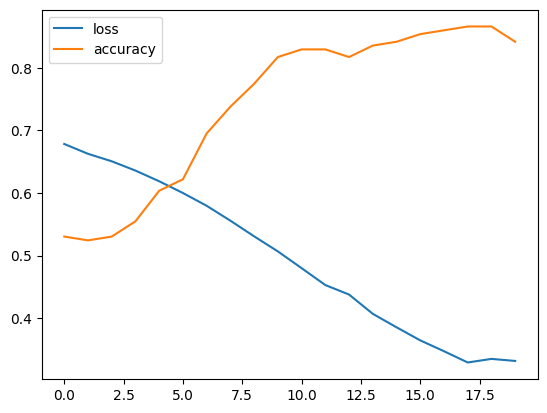

In [ ]:
pd.DataFrame(model_history.history).plot()